# Final cube analysis

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed #, interactive, fixed, interact_manual
import ipywidgets as widgets


import pickle

# name_data_file = '/home/alessio/n-Propagation/newExtrapolated_allCorrection.pickle'
name_data_file = '/home/alessio/n-Propagation/newExtrapolated_gammaExtrExag.pickle'
dataDict = np.load('/home/alessio/n-Propagation/datanewoneWithNACnow.npy')[()]
# name_data_file = '/home/alessio/n-Propagation/NAC_2_1_little_exagerated.pickle'

with open(name_data_file, "rb") as input_file:
    data = pickle.load(input_file)

%load_ext Cython

data.keys()

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


dict_keys(['geoCUBE', 'smoCube', 'kinCube', 'thes', 'phis', 'dipCUBE', 'potCube', 'gams'])

In [2]:
# name_data_file2 = 'NAC_2_1_little_exagerated.pickle'
# with open(name_data_file2, "rb") as input_file:
#     data2 = pickle.load(input_file)

# name_data_file3 = 'newExtrapolated_gammaExtrExag.pickle'
# with open(name_data_file3, "rb") as input_file:
#     data3 = pickle.load(input_file)    

In [3]:
# pot = data['potCube']
# pot2= data2['potCube']
# pot3 = data3['potCube']

# np.all(pot == pot3)

In [4]:
pot = data['potCube']
data['potCube'].shape

(55, 56, 160, 8)

## Coordinates

In [5]:
from quantumpropagator import fromLabelsToFloats, labTranformA

phis_ext = labTranformA(data['phis'])
gams_ext = labTranformA(data['gams'])
thes_ext = labTranformA(data['thes'])

phiV_ext, gamV_ext, theV_ext = fromLabelsToFloats(data)

# take step
dphi = phis_ext[0] - phis_ext[1]
dgam = gams_ext[0] - gams_ext[1]
dthe = thes_ext[0] - thes_ext[1]

# take range
range_phi = phis_ext[-1] - phis_ext[0]
range_gam = gams_ext[-1] - gams_ext[0]
range_the = thes_ext[-1] - thes_ext[0]


header = '         Labels extr.        internal extr.     dq      range\n'
string = 'Phi -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nGam -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}\nThe -> {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f} {:8.4f}'
out = (header + string).format(phiV_ext[-1],phiV_ext[0],phis_ext[-1],phis_ext[0],dphi,range_phi,
                               gamV_ext[-1],gamV_ext[0],gams_ext[-1],gams_ext[0],dgam,range_gam,
                               theV_ext[-1],theV_ext[0],thes_ext[-1],thes_ext[0],dthe,range_the)
print(out)

         Labels extr.        internal extr.     dq      range
Phi ->   0.1250  -0.1450  12.5000 -14.5000  -0.5000  27.0000
Gam ->   0.4294   0.1344  24.6050   7.7030  -0.3070  16.9020
The ->   0.5806   1.2008  66.5340 137.6000   0.4470 -71.0660


# NACS ANALYSIS

In [6]:
nacs = data['smoCube']

# take out zeros
NACS = nacs[15:-15,15:-15,30:-30]
phis = phis_ext[15:-15]
gams = gams_ext[15:-15]
thes = thes_ext[30:-30]
phiV = phiV_ext[15:-15]
gamV = gamV_ext[15:-15]
theV = theV_ext[30:-30]
# select the two states
print(NACS.shape, nacs.shape)

pL, gL, tL, sL, dL, coorL =  NACS.shape

(25, 26, 100, 8, 8, 3) (55, 56, 160, 8, 8, 3)


<IPython.core.display.Javascript object>


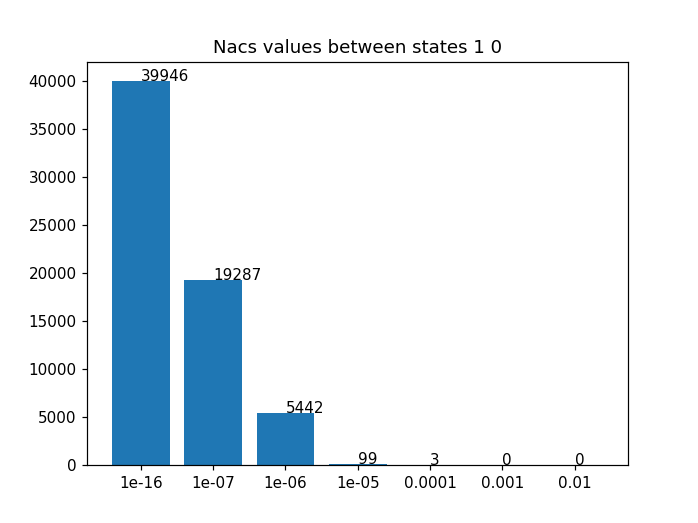

<IPython.core.display.Javascript object>


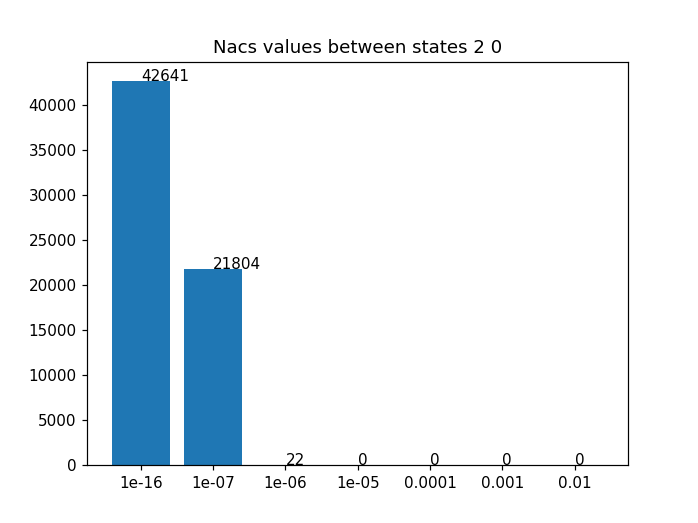

<IPython.core.display.Javascript object>


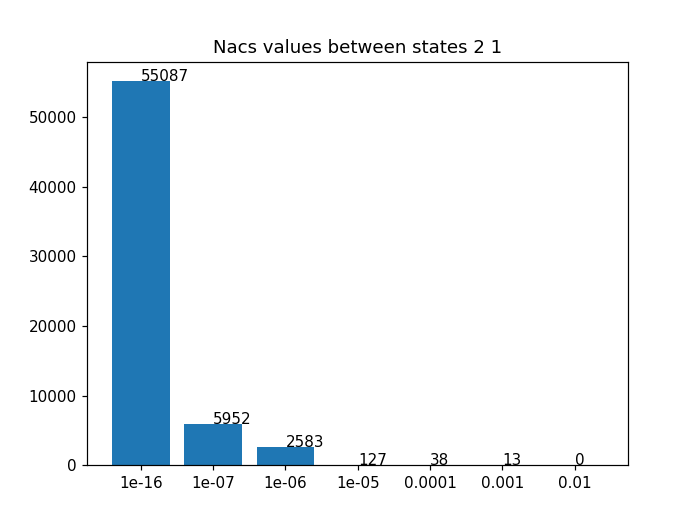

<IPython.core.display.Javascript object>


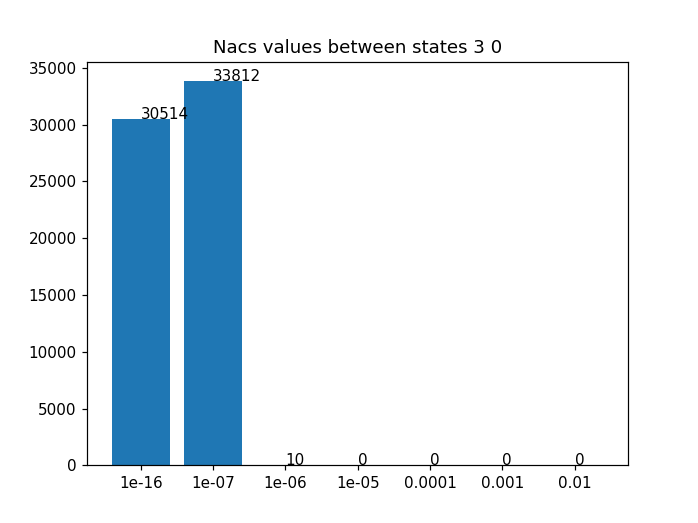

<IPython.core.display.Javascript object>


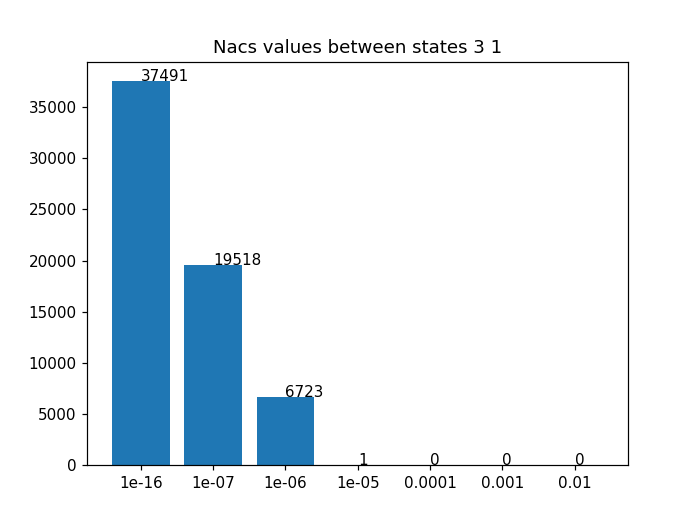

<IPython.core.display.Javascript object>


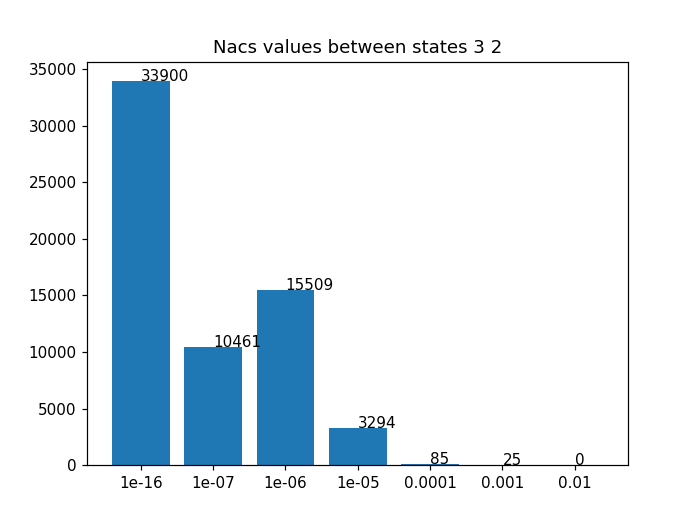

<IPython.core.display.Javascript object>


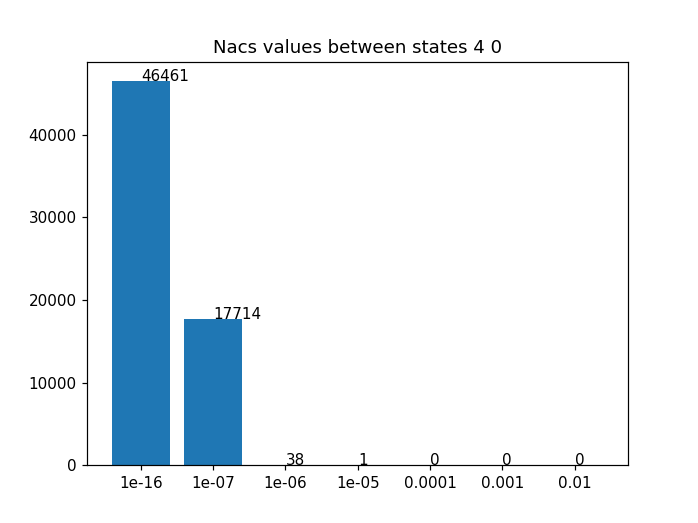

<IPython.core.display.Javascript object>


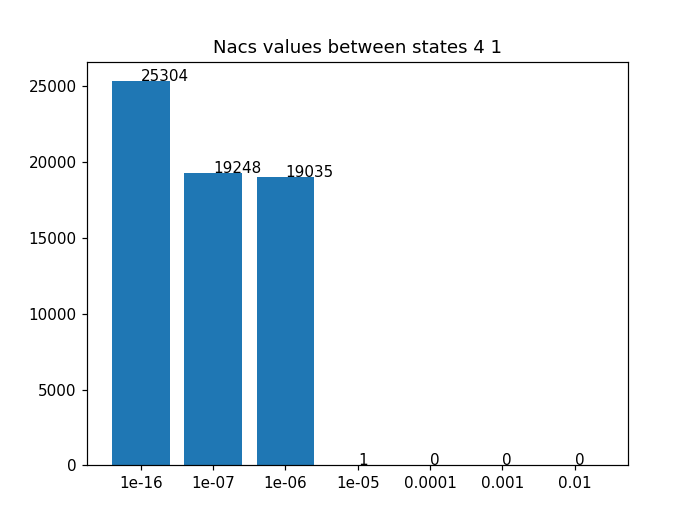

<IPython.core.display.Javascript object>


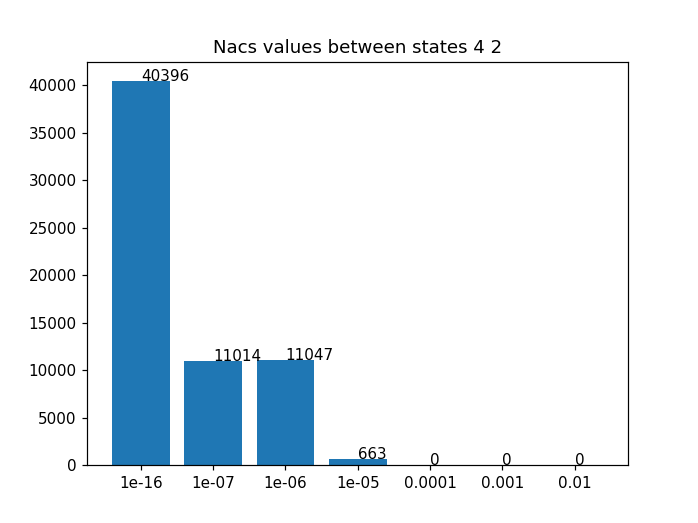

<IPython.core.display.Javascript object>


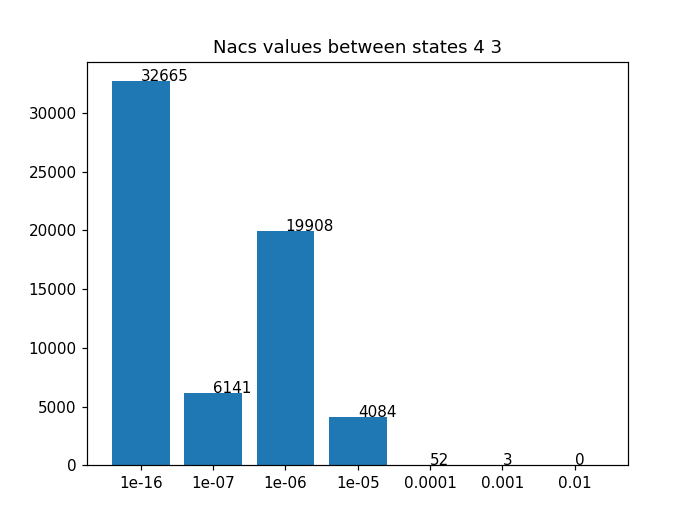

<IPython.core.display.Javascript object>


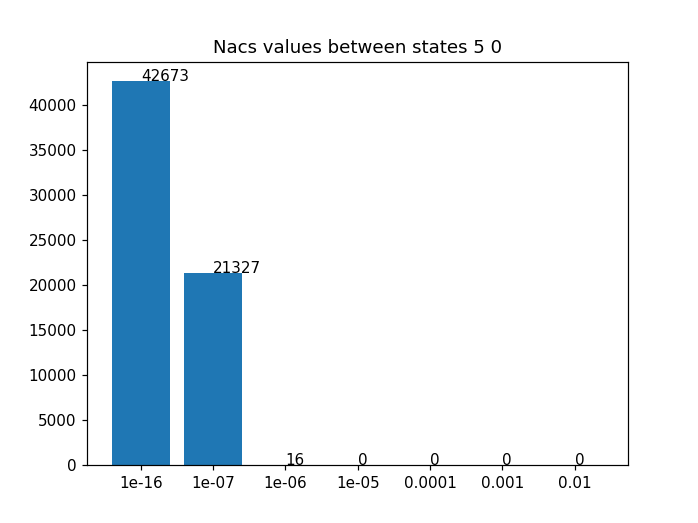

<IPython.core.display.Javascript object>


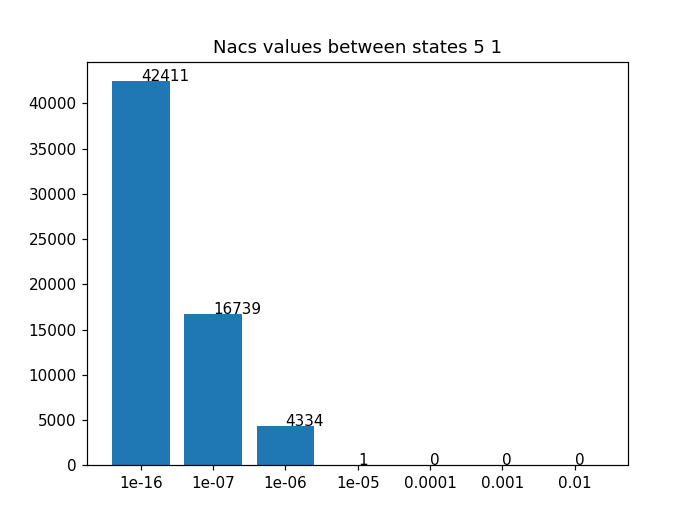

<IPython.core.display.Javascript object>


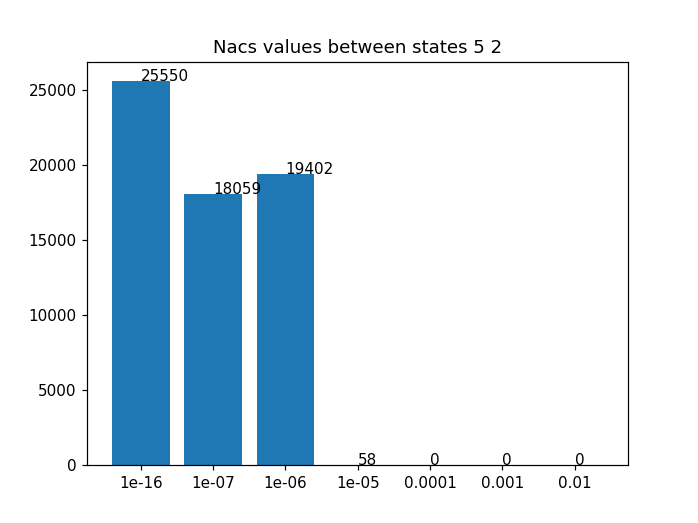

<IPython.core.display.Javascript object>


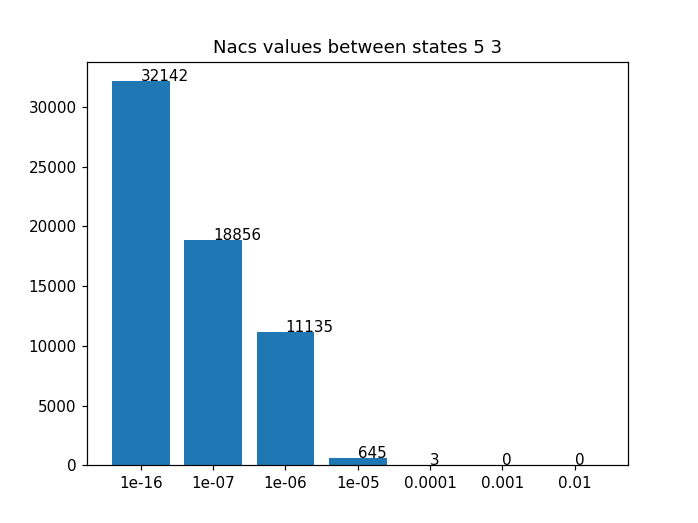

<IPython.core.display.Javascript object>


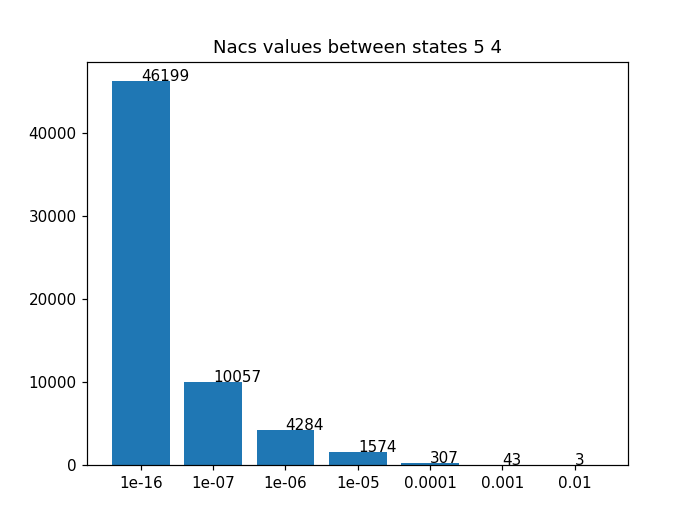

<IPython.core.display.Javascript object>


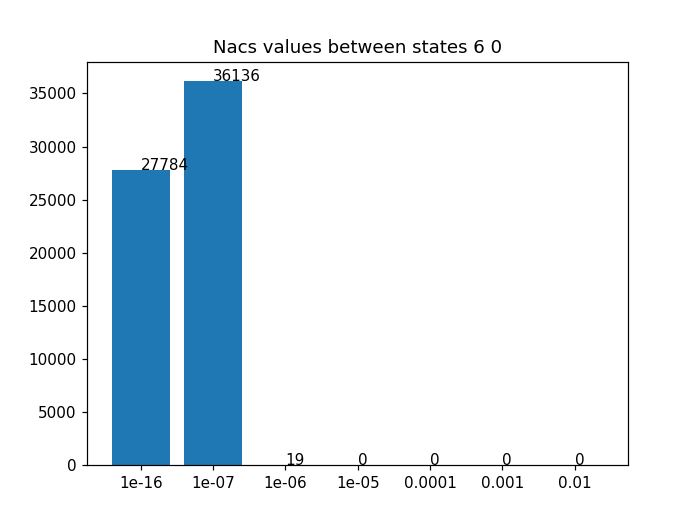

<IPython.core.display.Javascript object>


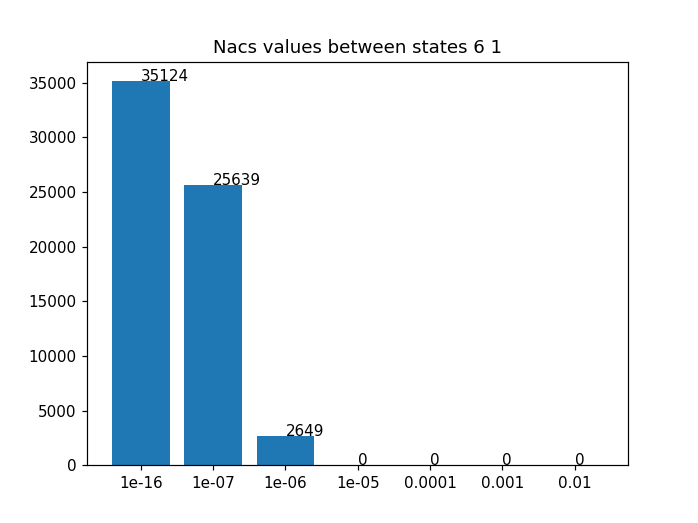

<IPython.core.display.Javascript object>


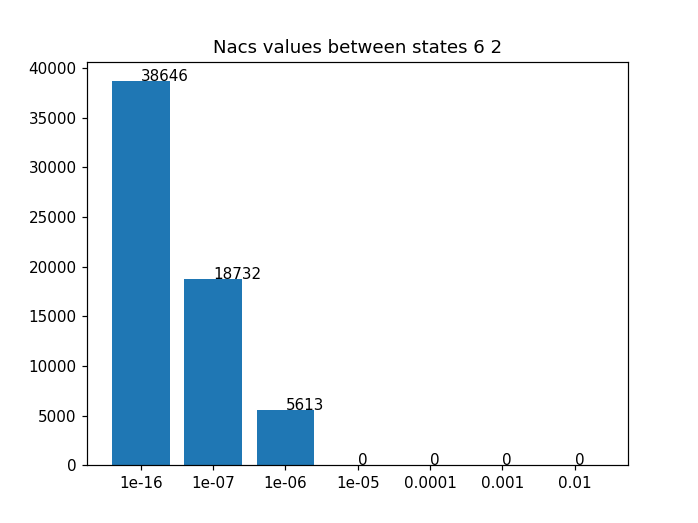

<IPython.core.display.Javascript object>


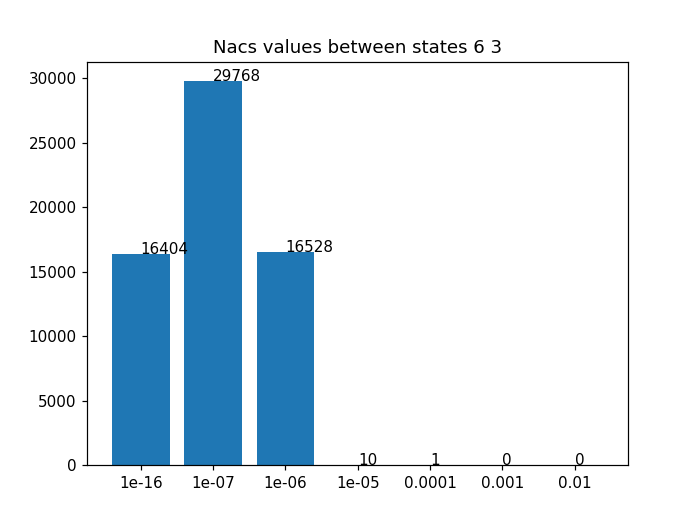

/home/alessio/config/miniconda/envs/quantumpropagator/lib/python3.5/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


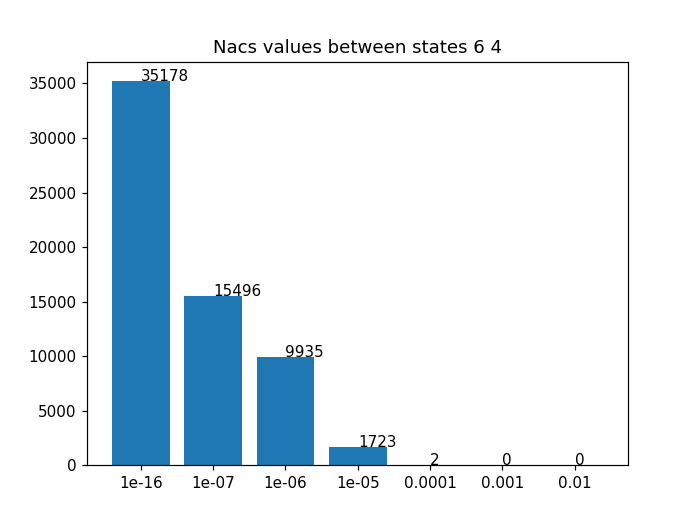

<IPython.core.display.Javascript object>


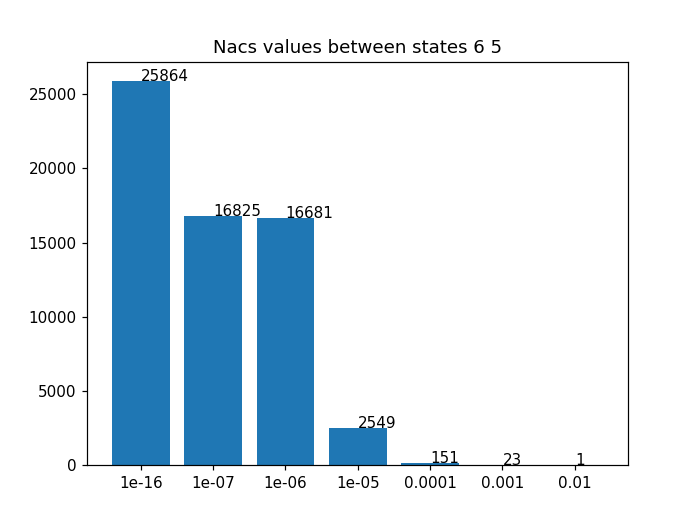

<IPython.core.display.Javascript object>


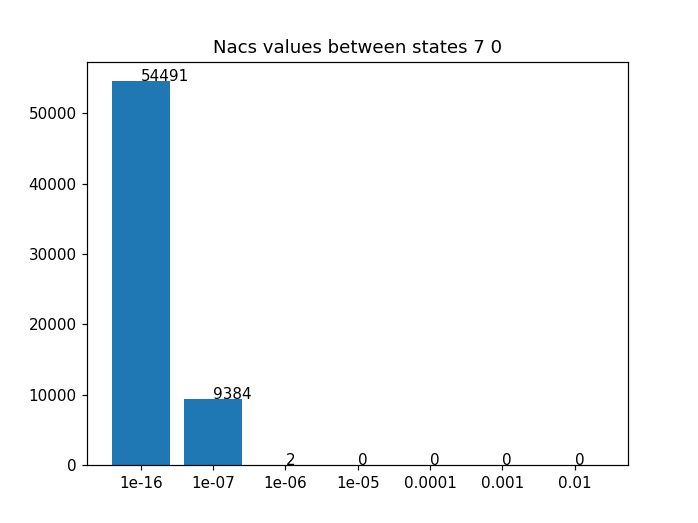

<IPython.core.display.Javascript object>


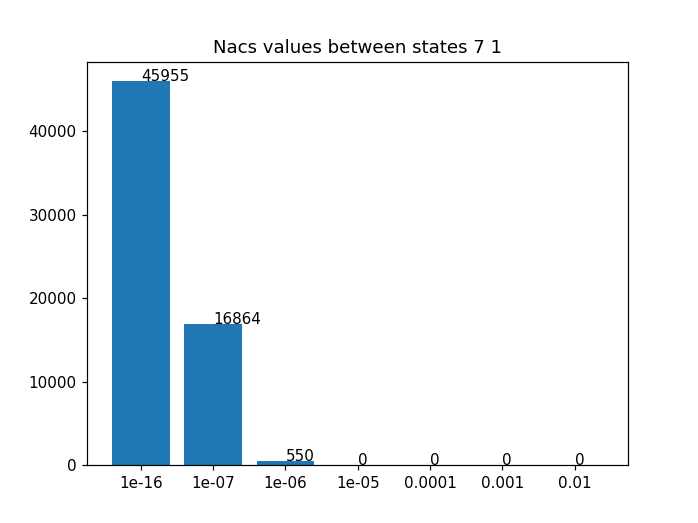

<IPython.core.display.Javascript object>


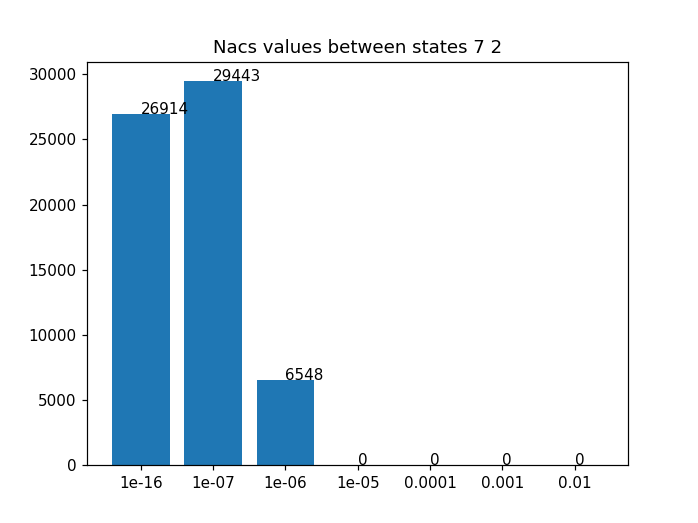

<IPython.core.display.Javascript object>


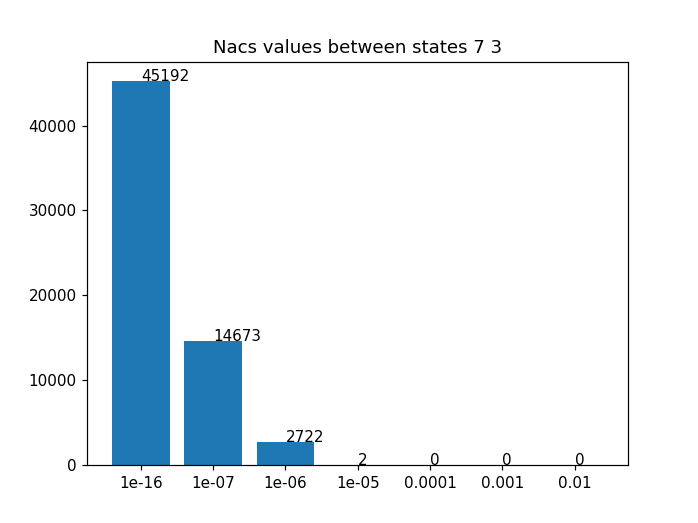

<IPython.core.display.Javascript object>


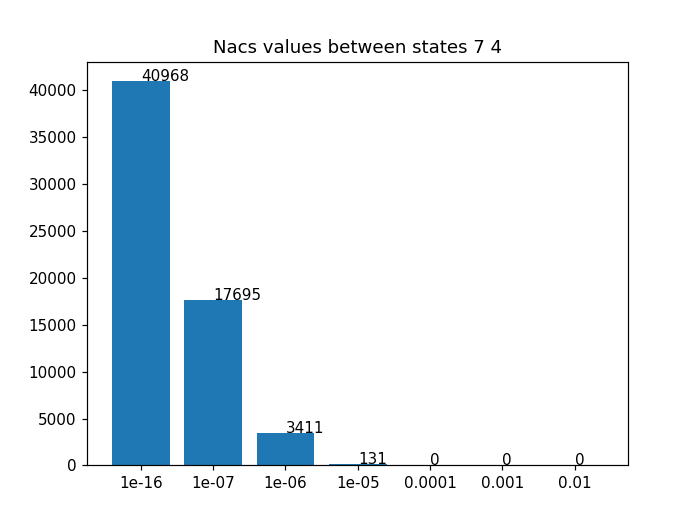

<IPython.core.display.Javascript object>


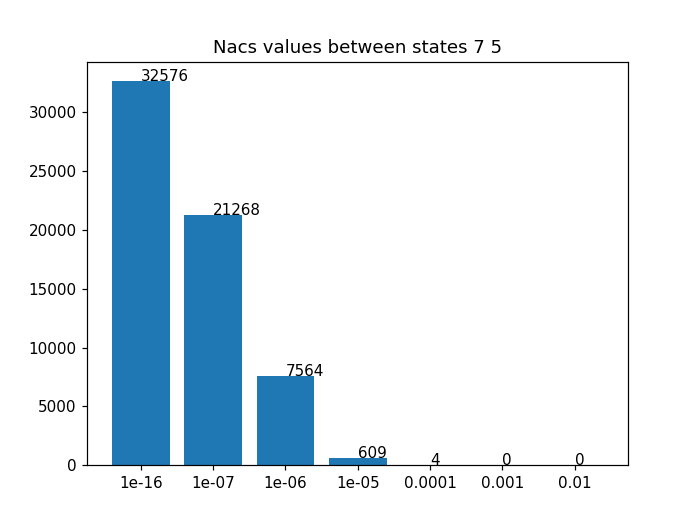

<IPython.core.display.Javascript object>


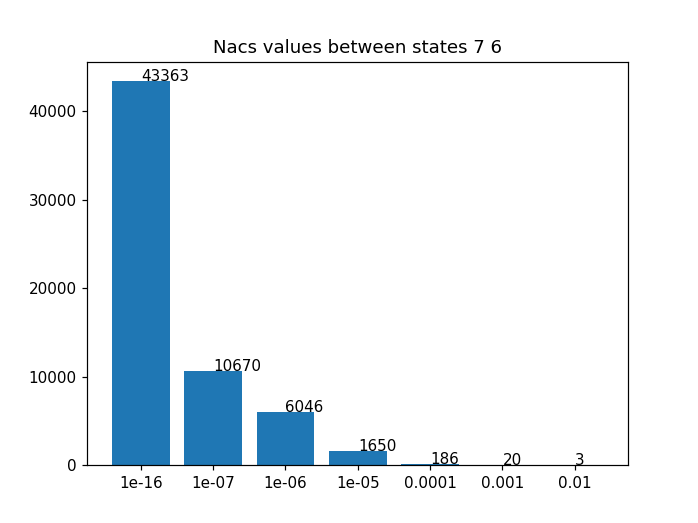

In [19]:
#%%time

n=10

makeGraph = True

if makeGraph:
    for s1 in range(8):
        for s2 in range(s1):

            a = np.abs(NACS[:,:,:,s1,s2,0].flatten())
            binZ = [0.0000000000000001, 0.0000001, 0.000001, 0.00001,0.0001,0.001,0.01,0.1]

            # thing here is the integer where I plot the bar (x position)
            thing = np.arange(len(binZ)-1)
            label_names = [ '{}'.format(x) for x in binZ ]


            counts, bins = np.histogram(a,bins=binZ)
            fig, ax0 = plt.subplots(1,1)
            ax0.bar(thing,counts)
            plt.xticks(thing,label_names)
            plt.title('Nacs values between states {} {}'.format(s1,s2))

            for xy in zip(thing, counts):
                ax0.annotate('{}'.format(xy[1]), xy=xy)



In [8]:
cart = 0
s1 = 5
s2 = 4
p = 22
g=5
t=77                 
elem = np.abs(NACS[p,g,t,s1,s2,cart])
neighbors = np.abs(np.array([NACS[p+1,g,t,s1,s2,cart],
                             NACS[p-1,g,t,s1,s2,cart],
                             NACS[p,g+1,t,s1,s2,cart],
                             NACS[p,g-1,t,s1,s2,cart],
                             NACS[p,g,t+1,s1,s2,cart],
                             NACS[p,g,t-1,s1,s2,cart]]))
lol = neighbors - elem
differences = np.amin(lol)
print('{} {} {} {}'.format(elem, neighbors, lol, differences))
print('States({},{}) -> Cube({:2},{:2},{:2}): {:5.3e}'.format(s1,s2,p,g,t,differences))

1.6770772077807276e-06 [  7.13985268e-05   2.87791758e-05   5.41729945e-05   4.19757212e-05
   2.06009194e-05   2.05771630e-05] [  6.97214496e-05   2.71020986e-05   5.24959173e-05   4.02986440e-05
   1.89238422e-05   1.89000858e-05] 1.8900085763046227e-05
States(5,4) -> Cube(22, 5,77): 1.890e-05


In [9]:
NACS

cart = 0
for s1 in range(sL):
    for s2 in range(s1):
        #for p in qp.log_progress(range(pL),every=1,size=(pL)):
        for p in range(1,pL-1):
            for g in range(1,gL-1):
                for t in range(1,tL-1):
                    elem = np.abs(NACS[p,g,t,s1,s2,cart])
                    neighbors = np.abs(np.array([NACS[p+1,g,t,s1,s2,cart],
                                                 NACS[p-1,g,t,s1,s2,cart],
                                                 NACS[p,g+1,t,s1,s2,cart],
                                                 NACS[p,g-1,t,s1,s2,cart],
                                                 NACS[p,g,t+1,s1,s2,cart],
                                                 NACS[p,g,t-1,s1,s2,cart]]))
                    differences = neighbors - elem
                    #print('{} {} {}'.format(elem, neighbors, differences))
                    if np.all(differences > 0.0001):
                         print('States({},{}) -> Cube({:2},{:2},{:2}): {:5.3e}'.format(s1,s2,p,g,t,differences))

# NACS visualization

In [18]:
def do3dplot(xs,ys,zss,z_lim):
    'with mesh function'
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.set_zlim(-1, 1)
    #ax.scatter(X, Y, zss)
    ax.plot_wireframe(X, Y, zss)
    
    if z_lim != 0:
        z_lim = 0.00001
        ax.set_zlim(-z_lim,z_lim)
    fig.tight_layout()

def visualize_this_thing(thing,state1,state2,cart,kind,dim,z_lim):
    along = ['Phi','Gam','The']

    if kind == 'Phi':
        pot = thing[dim,:,:,state1,state2,cart]
        do3dplot(gams,thes,pot,z_lim)
        print('\nLooking at SMO with indexes [{},:,:,{},{},{}]'.format(dim, state1,state2,cart))
    elif kind == 'Gam':
        pot = thing[:,dim,:,state1,state2,cart]
        do3dplot(phis,thes,pot,z_lim)
        print('\nLooking at SMO with indexes [:,{},:,{},{},{}]'.format(dim, state1,state2,cart))
    elif kind == 'The':        
        pot = thing[:,:,dim,state1,state2,cart]
        do3dplot(phis,gams,pot,z_lim)
        print('\nLooking at SMO with indexes [:,:,{},{},{},{}]'.format(dim, state1,state2,cart))
    print('NAC between state ({},{}) along {}\nDoing cut in {} with value ({:8.4f},{:8.4f})'.format(state1,
                                                                state2,
                                                                along[cart],
                                                                kind,
                                                                dimV[kind][dim],
                                                                dims[kind][dim]))
    print(thing.shape)

dimV = { 'Phi': phiV, 'Gam': gamV, 'The': theV } # real values
dims = { 'Phi': phis, 'Gam': gams, 'The': thes } # for labels

kinds = ['Phi','Gam','The']

def fun_pot2D(kind,state1, state2, cart,dim,z_lim):
    visualize_this_thing(NACS, state1, state2, cart, kind, dim, z_lim)
    
def nested(kinds):
    dimensionV = dimV[kinds]
    interact(fun_pot2D, kind=fixed(kinds), 
             state1 = widgets.IntSlider(min=0,max=7,step=1,value=0,continuous_update=False), 
             state2 = widgets.IntSlider(min=0,max=7,step=1,value=0,continuous_update=False), 
             cart = widgets.IntSlider(min=0,max=2,step=1,value=0,continuous_update=False), 
             dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0,continuous_update=False), 
             z_lim = widgets.FloatText(value=0))

interact(nested, kinds = ['Phi','Gam','The']);

A Jupyter Widget

In [13]:
# AAA is the plane at which I want to study the "only" point
AAA = NACS[10,:,:,1,2,2]
gam_That, the_That = np.unravel_index(AAA.argmin(), AAA.shape)
10, gam_That, the_That

phis[10],gams[gam_That],thes[the_That]

(-2.0, 16.614999999999998, 92.457999999999998)

## here we try to make interpolated "unified" NAC values for S_2 - S_1

In [31]:
%%cython --annotate --compile-args=-fopenmp --link-args=-fopenmp --force

### #%%cython

### #%%cython --annotate

import numpy as np
cimport numpy as np
cimport cython
from cython.parallel import prange


@cython.boundscheck(False)
@cython.wraparound(False)
@cython.cdivision(True)
@cython.nonecheck(False)
cdef void neigh(double [:,:,:,:] nacs_2_1, double [:,:,:,::1] bigger_2_1_nacs):
    cdef:
        int pL = 25, gL = 26, tL = 100,coorL=3
        int p1,g1,t1,p2,g2,t2,coor,tuplL,pg
        double thresh

    thresh = 0.0001
    
    tuplL = pL*gL
    
    for coor in range(coorL):
        #for pg in prange(tuplL, nogil=True, schedule='dynamic',num_threads=16):
        for pg in range(tuplL):
            p1 = pg // gL
            g1 = pg % gL
            for t1 in range(tL):
#                 for p2 in range(pL):
#                     for g2 in range(gL):
#                         for t2 in range(tL):
#                             if abs(nacs_2_1[p1,g1,t1,coor]) < 0.000001:
#                                 bigger_2_1_nacs[p1,g1,t1,coor] = nacs_2_1[p1,g1,t1,coor]*100
#                             elif abs(nacs_2_1[p1,g1,t1,coor]) < 0.00001:
                                bigger_2_1_nacs[p1,g1,t1,coor] = nacs_2_1[p1,g1,t1,coor]*100
                     
#     return(bigger_2_1_nacs)

def neighbor(nacs_2_1,bigger_2_1_nacs):
    return np.asarray(neigh(nacs_2_1,bigger_2_1_nacs))

print('done')

done


In [34]:
%%time
state1 = 2
state2 = 1
nacs_2_1 = NACS[:,:,:,state1,state2,:]
nacs_other = NACS[:,:,:,state2,state1,:]

print(np.all(nacs_2_1 == -nacs_other))

print(nacs_2_1.shape)
bigger_2_1_nacs = np.zeros_like(nacs_2_1)

neighbor(nacs_2_1,bigger_2_1_nacs)


saveFile = False

dictio = {}

a=0

if saveFile:
    for coord in range(3):
        filename = '/home/alessio/k-nokick/IMPORTANTS/VISUALIZE_NACS/newNacSmoother/Nac{:04}.h5'.format(a)
        # I reput the zeros out.
        external = np.pad(vector[:,:,:,coord], ((15,15),(15,15),(30,30)), 'constant')
        dictio['NACS'] = external
        dictio['state1'] = state1
        dictio['state2'] = state2
        dictio['cart'] = coord
        qp.writeH5fileDict(filename, dictio)
        a += 1
        filename = '/home/alessio/k-nokick/IMPORTANTS/VISUALIZE_NACS/newNacSmoother/Nac{:04}.h5'.format(a)
        dictio['NACS'] = np.pad(nacs_2_1[:,:,:,coord], ((15,15),(15,15),(30,30)), 'constant')
        dictio['state1'] = state1
        dictio['state2'] = state2
        dictio['cart'] = coord
        qp.writeH5fileDict(filename, dictio)
        a += 1

True
(25, 26, 100, 3)
CPU times: user 8.41 ms, sys: 69 µs, total: 8.48 ms
Wall time: 7.83 ms


In [ ]:
# PUT TRUE IF YOU WANT TO EXAGERATE AND CHANGE THE NACS
do_it = False


nacs_2_1 = nacs[:,:,:,1,2,:]
bigger_2_1_nacs = np.empty_like(nacs_2_1)

#print(bigger_2_1_nacs.shape)

pL,gL,tL,coorL = bigger_2_1_nacs.shape

for p in qp.log_progress(pL,every=1,size=(len(pL))):
    for g in range(gL):
        for t in range(tL):
            for coor in range(coorL):
                elem = nacs_2_1[p,g,t,coor] 
                if np.abs(elem) > 0.0001:
                    
                    first = 2
                    secon = 4
                    
                    # proximity(6)
                    bigger_2_1_nacs[p+1,g,t,coor] = elem/first
                    bigger_2_1_nacs[p-1,g,t,coor] = elem/first
                    bigger_2_1_nacs[p,g+1,t,coor] = elem/first
                    bigger_2_1_nacs[p,g-1,t,coor] = elem/first
                    bigger_2_1_nacs[p,g,t+1,coor] = elem/first
                    bigger_2_1_nacs[p,g,t-1,coor] = elem/first
                    
                    # Corners (8)
                    bigger_2_1_nacs[p+1,g+1,t+1,coor] = elem/secon     # 000
                    bigger_2_1_nacs[p+1,g+1,t-1,coor] = elem/secon     
                    bigger_2_1_nacs[p+1,g-1,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p+1,g-1,t-1,coor] = elem/secon     # 011
                    bigger_2_1_nacs[p-1,g+1,t+1,coor] = elem/secon     # 000
                    bigger_2_1_nacs[p-1,g+1,t-1,coor] = elem/secon     
                    bigger_2_1_nacs[p-1,g-1,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p-1,g-1,t-1,coor] = elem/secon     # 011

                    # Half sides (12)
                    bigger_2_1_nacs[p+1,g,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p+1,g,t-1,coor] = elem/secon
                    bigger_2_1_nacs[p-1,g,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p-1,g,t-1,coor] = elem/secon
                    bigger_2_1_nacs[p+1,g+1,t,coor] = elem/secon
                    bigger_2_1_nacs[p+1,g-1,t,coor] = elem/secon
                    bigger_2_1_nacs[p-1,g+1,t,coor] = elem/secon
                    bigger_2_1_nacs[p-1,g-1,t,coor] = elem/secon
                    bigger_2_1_nacs[p,g+1,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p,g+1,t-1,coor] = elem/secon
                    bigger_2_1_nacs[p,g-1,t+1,coor] = elem/secon
                    bigger_2_1_nacs[p,g-1,t-1,coor] = elem/secon

                    
                    # 2 distant (6)
                    bigger_2_1_nacs[p+2,g,t,coor] = elem/secon
                    bigger_2_1_nacs[p-2,g,t,coor] = elem/secon
                    bigger_2_1_nacs[p,g+2,t,coor] = elem/secon
                    bigger_2_1_nacs[p,g-2,t,coor] = elem/secon
                    bigger_2_1_nacs[p,g,t+2,coor] = elem/secon
                    bigger_2_1_nacs[p,g,t-2,coor] = elem/secon
                 
                    #print('{} {} {} {} {}'.format(p,g,t,coor,elem))
                else:
                    bigger_2_1_nacs[p,g,t,coor] = elem

                   
                    

if do_it:
    data_new = data
    name_data_file_new = 'NAC_2_1_little_exagerated.pickle'
    print(data_new.keys())
    nacs[:,:,:,1,2,:] = bigger_2_1_nacs
    nacs[:,:,:,2,1,:] = -bigger_2_1_nacs
    data_new['smoCube'] = nacs
    pickle.dump( data_new, open( name_data_file_new, "wb" ) )                    
                    


# DIPOLES visualization

In [11]:
dipo = data['dipCUBE']
DIPO = dipo[15:-15,15:-15,30:-30]
dipo.shape, DIPO.shape

((55, 56, 160, 3, 8, 8), (25, 26, 100, 3, 8, 8))

In [12]:
def do3dplot(xs,ys,zss):
    'with mesh function'
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    X,Y = np.meshgrid(ys,xs)
    #ax.set_zlim(-1, 1)
    #ax.scatter(X, Y, zss)
    ax.plot_wireframe(X, Y, zss)
    fig.tight_layout()

def visualize_this_thing(thing,state1,state2,cart,kind,dim):
    print(thing.shape)

    along = ['X','Y','Z']
    print('DIPOLE between state ({},{}) along {}\nDoing cut in {} with value ({:8.4f},{:8.4f})'.format(state1,
                                                                state2,
                                                                along[cart],
                                                                kind,
                                                                dimV[kind][dim],
                                                                dims[kind][dim]))
    if kind == 'Phi':
        pot = thing[dim,:,:,cart,state1,state2]
        print('\nLooking at DIPOLE with indexes [{},:,:,{},{},{}]'.format(dim,cart,state1,state2))
        do3dplot(gams,thes,pot)
    elif kind == 'Gam':
        print('\nLooking at DIPOLE with indexes [:,{},:,{},{},{}]'.format(dim,cart,state1,state2))
        pot = thing[:,dim,:,cart,state1,state2]
        do3dplot(phis,thes,pot)
    elif kind == 'The':
        print('\nLooking at DIPOLE with indexes [:,:,{},{},{},{}]'.format(dim,cart,state1,state2))
        pot = thing[:,:,dim,cart,state1,state2]
        do3dplot(phis,gams,pot)


dimV = { 'Phi': phiV, 'Gam': gamV, 'The': theV } # real values
dims = { 'Phi': phis, 'Gam': gams, 'The': thes } # for labels

kinds = ['Phi','Gam','The']

def fun_pot2D(kind,state1, state2, cart,dim):
    visualize_this_thing(DIPO, state1, state2, cart, kind, dim)
    
def nested(kinds):
    dimensionV = dimV[kinds]
    interact(fun_pot2D, kind=fixed(kinds), 
             state1 = widgets.IntSlider(min=0,max=7,step=1,value=0,continuous_update=False), 
             state2 = widgets.IntSlider(min=0,max=7,step=1,value=0,continuous_update=False), 
             cart = widgets.IntSlider(min=0,max=2,step=1,value=0,continuous_update=False), 
             dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0,continuous_update=False))

interact(nested, kinds = ['Phi','Gam','The']);

A Jupyter Widget

#### Minimum geometry is found by getting the minimum on the ground state potential

In [13]:
pot = data['potCube'] - data['potCube'].min()
A = pot
# find the minimum index having the shape
phi_min, gam_min, the_min, state_min = np.unravel_index(A.argmin(), A.shape)
phi_min, gam_min, the_min, state_min

(29, 28, 55, 0)

#### CI geometry by taking the maximum NAC value between 0 and 1

In [14]:
nacs.shape

(55, 56, 160, 8, 8, 3)

In [15]:
B = nacs[:,:,:,:,1,0]

In [16]:
# this should be absolute value
phi_ci, gam_ci, the_ci, cart_ci = np.unravel_index(B.argmax(), B.shape)
np.unravel_index(B.argmax(), B.shape)

(19, 32, 62, 2)

In [17]:
phis_ext[16],gams_ext[15],thes_ext[112]

(-6.5, 12.308, 87.542000000000002)

In [18]:
phi_ci, gam_ci, the_ci = [16,15,112]

# Product/reactant catcher
Here I want to generate the cubes of 1 and 0 to catch different regions of my cube.

So, now I want to do this. I want to create several cubes with different regions (basically the cubes are of 1 and 0). A is FC region, B is PRODUCT region and C is REACTANT

In [19]:
# I start by making a cube of 0.

# boolean that creates (and overwrite) the file 
create_mask_file = False

ZERO = np.zeros_like(pot[:,:,:,0])
print(ZERO.shape)

region_a = np.zeros_like(ZERO)
region_b = np.zeros_like(ZERO)
region_c = np.zeros_like(ZERO)

#   for pi, p in qp.log_progress(enumerate(phis_n),every=1,size=(len(phis_n))):

# p_linea_a = 18
# g_linea_S = 30
# t_linea_b = 112

p_linea_a, g_linea_S, t_linea_b = 18, 30, 112

m_coeff,q_coeff = 1.7,75

for p,phi in qp.log_progress(enumerate(phis_ext),every=1,size=(len(phis_ext))):
    for g,gam in enumerate(gams_ext):
        lineValue_theta =  m_coeff * g + q_coeff
        for t,the in enumerate(thes_ext):
            if p > p_linea_a:
                region_a[p,g,t] = 1
            if p <= p_linea_a:
                if t > lineValue_theta:
                    region_c[p,g,t] = 1
                else:
                    region_b[p,g,t] = 1


#                 if t > t_linea_b and g < g_linea_S:
#                     region_c[p,g,t] = 1
#                 else:
#                     region_b[p,g,t] = 1
                
            # to paint cubes on the verge I make zero the sides values
            if p==0 or g == 0 or t == 0 or p == len(phis_ext)-1 or g == len(gams_ext)-1 or t == len(thes_ext)-1:
                region_a[p,g,t] = 0
                region_b[p,g,t] = 0
                region_c[p,g,t] = 0

regions = [{'label' : 'FC', 'cube': region_a},{'label' : 'reactants', 'cube': region_b},{'label' : 'products', 'cube': region_c}]

if create_mask_file:
    print('I created the regions pickle file')
    pickle.dump(regions, open('regions.pickle', "wb" ) )
else:
    qp.warning("file region NOT written, check the variable 'create_mask_file' if you want to write region file")

(55, 56, 160)


A Jupyter Widget



*****************************************************************************************************
*                                                                                                   *
*  file region NOT written, check the variable 'create_mask_file' if you want to write region file  *
*                                                                                                   *
*****************************************************************************************************





# HERE THE REGIONS FOR ADVANCED MASKS

In [21]:
# I start by making a cube of 0.

# boolean that creates (and overwrite) the file 
create_adv_mask_files = False

ZERO = np.zeros_like(pot[:,:,:,0])
ones = np.ones_like(pot[:,:,:,0])
print(ZERO.shape)

mask_CI = np.zeros_like(ZERO)
mask_AFC = np.zeros_like(ZERO)

# 18, 30, 112

#p_cube1, p_cube2, g_cube1, g_cube2, t_cube1, t_cube2 = 12, 29, 15, 32, 82, 142
p_CI_cube1, p_CI_cube2, g_CI_cube1, g_CI_cube2, t_CI_cube1, t_CI_cube2 = 12, 29, 15, 32, 82, 142 

p_AFC_cube1, p_AFC_cube2, g_AFC_cube1, g_AFC_cube2, t_AFC_cube1, t_AFC_cube2 = 0, 54, 0, 55, 85, 159 

for p,phi in qp.log_progress(enumerate(phis_ext),every=1,size=(len(phis_ext))):
    for g,gam in enumerate(gams_ext):
        for t,the in enumerate(thes_ext):
            if p > p_CI_cube1 and p < p_CI_cube2 and g > g_CI_cube1 and g < g_CI_cube2 and t > t_CI_cube1 and t < t_CI_cube2:
                mask_CI[p,g,t] = 1

            if p > p_AFC_cube1 and p < p_AFC_cube2 and g > g_AFC_cube1 and g < g_AFC_cube2 and t > t_AFC_cube1 and t < t_AFC_cube2:
                mask_AFC[p,g,t] = 1
            # to paint cubes on the verge I make zero the sides values
            if p==0 or g == 0 or t == 0 or p == len(phis_ext)-1 or g == len(gams_ext)-1 or t == len(thes_ext)-1:
                ones[p,g,t] = 0
                mask_AFC[p,g,t] = 0


masks_only_one = [{'label' : 'All', 'cube': ones, 'states':[0,1,2,3,4,5,6,7], 'show' : False}]

masks          = [
                  {'label' : 'All', 'cube': ones,   'states':[0,1,2,3,4,5,6,7],  'show' : False},
                  {'label' : 'AfterFC',  'cube': mask_AFC, 'states':[0,1,2,3,4,5,6,7],  'show' : True},
                  {'label' : 'CI',  'cube': mask_CI, 'states':[0,1,2,3,4,5,6,7],  'show' : True},
                 ]

#                  {'label' : 'Mask CI', 'cube': mask_a, 'states':[0,1]}]

#masks          = [{'label' : 'Mask', 'cube': ones, 'states':[0,1,2,3,4,5,6,7]}]


if create_adv_mask_files:
    print('I created the regions pickle file')
    pickle.dump(masks_only_one, open('advanced_masks_onlyONE.pickle', "wb" ))
    pickle.dump(masks, open('advanced_masks.pickle', "wb" ))

else:
    qp.warning("file advanced_masks NOT written, check the variable 'create_adv_mask_files' if you want to write region file")

(55, 56, 160)


A Jupyter Widget



******************************************************************************************************************
*                                                                                                                *
*  file advanced_masks NOT written, check the variable 'create_adv_mask_files' if you want to write region file  *
*                                                                                                                *
******************************************************************************************************************





#### Here I check the direction of the permanent dipoles.

In [22]:
# dipo_min = dipo[phi_min, gam_min, the_min]
# dipo_ci = dipo[phi_ci, gam_ci, the_ci]
# difference_dipo = dipo_ci - dipo_min

# for i in range(8):
#     permanent = difference_dipo[:,i,i]
#     print('S_{} -> {}'.format(i,permanent))

In [23]:
# dipo_min[:,1,2],dipo_min[:,0,1],dipo_min[:,0,6],dipo_min[:,0,3],dipo_min[:,0,2],dipo_min[:,0,7]


## temporary cells for last correction sign

In [24]:
# npy = '/home/alessio/Desktop/NAC_CORRECTION_NOVEMBER2018/dataprova.npy'
# dictio = np.load(npy)[()]
# dictio.keys()

In [25]:
# NACS2 = dictio['nacCUBE']
# NACS2.shape

In [26]:
# def do3dplot(xs,ys,zss):
#     'with mesh function'
#     fig = plt.figure(figsize=(9,9))
#     ax = fig.add_subplot(111, projection='3d')
#     X,Y = np.meshgrid(ys,xs)
#     #ax.set_zlim(-1, 1)
#     #ax.scatter(X, Y, zss)
#     ax.plot_wireframe(X, Y, zss)
#     fig.tight_layout()

# def visualize_this_thing(thing,state1,state2,cart,kind,dim):
#     print(thing.shape)
#     print('\nWARNING, this is not fully correct!!! Not SMO and not really what you think\n')

#     along = ['Phi','Gam','The']
#     print('NAC between state ({},{}) along {}\nDoing cut in {} with value ({:8.4f},{:8.4f})'.format(state1,
#                                                                 state2,
#                                                                 along[cart],
#                                                                 kind,
#                                                                 dimV[kind][dim],
#                                                                 dims[kind][dim]))
#     if kind == 'Phi':
#         pot = thing[dim,:,:,state1,state2,0,cart]
#         print('\nLooking at SMO with indexes [{},:,:,{},{},{}]'.format(dim, state1,state2,cart))
#         do3dplot(gams,thes,pot)
#     elif kind == 'Gam':
#         print('\nLooking at SMO with indexes [:,{},:,{},{},{}]'.format(dim, state1,state2,cart))
#         pot = thing[:,dim,:,state1,state2,0,cart]
#         do3dplot(phis,thes,pot)
#     elif kind == 'The':
#         print('\nLooking at SMO with indexes [:,:,{},{},{},{}]'.format(dim, state1,state2,cart))
#         pot = thing[:,:,dim,state1,state2,0,cart]
#         do3dplot(phis,gams,pot)


# dimV = { 'Phi': phiV, 'Gam': gamV, 'The': theV } # real values
# dims = { 'Phi': phis, 'Gam': gams, 'The': thes } # for labels

# kinds = ['Phi','Gam','The']

# def fun_pot2D(kind,state1, state2, cart,dim):
#     visualize_this_thing(NACS2, state1, state2, cart, kind, dim)
    
# def nested(kinds):
#     dimensionV = dimV[kinds]
#     interact(fun_pot2D, kind=fixed(kinds), state1 = widgets.IntSlider(min=0,max=7,step=1,value=0), state2 = widgets.IntSlider(min=0,max=7,step=1,value=0), cart = widgets.IntSlider(min=0,max=2,step=1,value=0), dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0))

# interact(nested, kinds = ['Phi','Gam','The']);

# sign flipper on extrapolated SMO cube
you used the cells below to correct NAC on the main plane... it was still flipping

In [27]:
# print(data.keys())
# data_new = data
# nacs_new = data['smoCube']
# NACS_new = nacs_new[15:-15,15:-15,30:-30]
# print(NACS_new.shape,nacs_new.shape)

# phi_ext_000_000 = 29
# phi_prev = 28
# phi_next = 30

# new_nacs = np.copy(nacs)

# for g in range(56):
#     for t in range(160):
#         not_correct  = nacs[phi_ext_000_000,g,t]
#         correct_prev = nacs[phi_prev       ,g,t]
#         correct_next = nacs[phi_next       ,g,t]
#         #if np.linalg.norm(not_correct) > 0.001:
#         #        print('{} {}\nThis {} \nMiddle {}\n After {}'.format(g,t,correct_prev[:,:,1], not_correct[:,:,1],correct_next[:,:,1]))
#         for state1 in range(8):
#             for state2 in range(8):
#                 for cart in range(3):
#                     value_prev = correct_prev[state1,state2,cart]
#                     value_this = not_correct [state1,state2,cart]
#                     value_next = correct_next[state1,state2,cart]
#                     average = (value_prev + value_next)/2
#                     if np.sign(average) == np.sign(value_this):
#                         new_value = value_this
#                     else:
#                         new_value = -value_this 
#                     new_nacs[phi_ext_000_000,g,t,state1,state2,cart] = new_value
                    
                    

In [28]:
# def do3dplot(xs,ys,zss):
#     'with mesh function'
#     fig = plt.figure(figsize=(9,9))
#     ax = fig.add_subplot(111, projection='3d')
#     X,Y = np.meshgrid(ys,xs)
#     #ax.set_zlim(-1, 1)
#     #ax.scatter(X, Y, zss)
#     ax.plot_wireframe(X, Y, zss)
#     fig.tight_layout()

# def visualize_this_thing(thing,state1,state2,cart,kind,dim):
#     print(thing.shape)

#     along = ['Phi','Gam','The']
#     print('NAC between state ({},{}) along {}\nDoing cut in {} with value ({:8.4f},{:8.4f})'.format(state1,
#                                                                 state2,
#                                                                 along[cart],
#                                                                 kind,
#                                                                 dimV[kind][dim],
#                                                                 dims[kind][dim]))
#     if kind == 'Phi':
#         pot = thing[dim,:,:,state1,state2,cart]
#         print('\nLooking at SMO with indexes [{},:,:,{},{},{}]'.format(dim, state1,state2,cart))
#         do3dplot(gams_ext,thes_ext,pot)
#     elif kind == 'Gam':
#         print('\nLooking at SMO with indexes [:,{},:,{},{},{}]'.format(dim, state1,state2,cart))
#         pot = thing[:,dim,:,state1,state2,cart]
#         do3dplot(phis_ext,thes_ext,pot)
#     elif kind == 'The':
#         print('\nLooking at SMO with indexes [:,:,{},{},{},{}]'.format(dim, state1,state2,cart))
#         pot = thing[:,:,dim,state1,state2,cart]
#         do3dplot(phis_ext,gams_ext,pot)


# dimV = { 'Phi': phiV_ext, 'Gam': gamV_ext, 'The': theV_ext } # real values
# dims = { 'Phi': phis_ext, 'Gam': gams_ext, 'The': thes_ext } # for labels

# kinds = ['Phi','Gam','The']

# def fun_pot2D(kind,state1, state2, cart,dim):
#     visualize_this_thing(new_nacs, state1, state2, cart, kind, dim)
    
# def nested(kinds):
#     dimensionV = dimV[kinds]
#     interact(fun_pot2D, kind=fixed(kinds), state1 = widgets.IntSlider(min=0,max=7,step=1,value=0), state2 = widgets.IntSlider(min=0,max=7,step=1,value=0), cart = widgets.IntSlider(min=0,max=2,step=1,value=0), dim = widgets.IntSlider(min=0,max=(len(dimensionV)-1),step=1,value=0))

# interact(nested, kinds = ['Phi','Gam','The']);

### Things regarding writing down the Pickle file

In [29]:
#name_data_file_new = 'newExtrapolated_allCorrectionSECOND.pickle'
#data_new.keys()

In [30]:
# data_new['smoCube'] = new_nacs
# pickle.dump( data_new, open( name_data_file_new, "wb" ) )

# those cells here are used to visualize in 3d space the dipoles/nac

In [31]:
folder = '.'
a=0

saveFile = False

for state1 in range(8):
    for state2 in range(state1):
        for cart in range(3):
            dictio = {}
            cartL = ['X','Y','Z']
            print('Nacs ({},{}) along {} -> {:04}'.format(state1,state2,cartL[cart],a))
            a+=1
            
            if saveFile:
                filename = 'Nac{:04}.h5'.format(a)
                dictio['NACS'] = nacs[:,:,:,state1,state2,cart]
                dictio['state1'] = state1
                dictio['state2'] = state2
                dictio['cart'] = cart
                qp.writeH5fileDict(filename, dictio)


Nacs (1,0) along X -> 0000
Nacs (1,0) along Y -> 0001
Nacs (1,0) along Z -> 0002
Nacs (2,0) along X -> 0003
Nacs (2,0) along Y -> 0004
Nacs (2,0) along Z -> 0005
Nacs (2,1) along X -> 0006
Nacs (2,1) along Y -> 0007
Nacs (2,1) along Z -> 0008
Nacs (3,0) along X -> 0009
Nacs (3,0) along Y -> 0010
Nacs (3,0) along Z -> 0011
Nacs (3,1) along X -> 0012
Nacs (3,1) along Y -> 0013
Nacs (3,1) along Z -> 0014
Nacs (3,2) along X -> 0015
Nacs (3,2) along Y -> 0016
Nacs (3,2) along Z -> 0017
Nacs (4,0) along X -> 0018
Nacs (4,0) along Y -> 0019
Nacs (4,0) along Z -> 0020
Nacs (4,1) along X -> 0021
Nacs (4,1) along Y -> 0022
Nacs (4,1) along Z -> 0023
Nacs (4,2) along X -> 0024
Nacs (4,2) along Y -> 0025
Nacs (4,2) along Z -> 0026
Nacs (4,3) along X -> 0027
Nacs (4,3) along Y -> 0028
Nacs (4,3) along Z -> 0029
Nacs (5,0) along X -> 0030
Nacs (5,0) along Y -> 0031
Nacs (5,0) along Z -> 0032
Nacs (5,1) along X -> 0033
Nacs (5,1) along Y -> 0034
Nacs (5,1) along Z -> 0035
Nacs (5,2) along X -> 0036
N

# those to make the wall on extrapolated gamma values

In [32]:
# lol2 is the new function to be added 
phi_index = 16
theta_index = 81
state_index = 0

lol = pot[phi_index,:,theta_index,state_index]

num = 15
constant = 0.001
lol2 = np.zeros_like(lol)
for i in range(num):
    lol2[i] = constant * (i-num)**2
    #print('{} {} {}'.format(i,num,i-num))

<IPython.core.display.Javascript object>


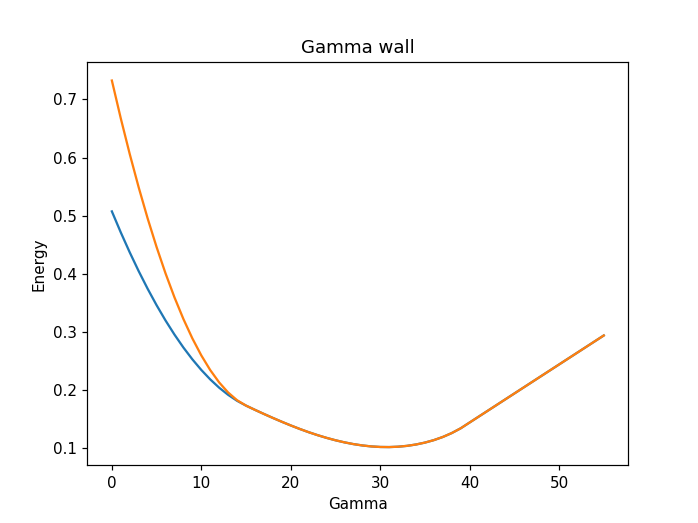

In [33]:
fig = plt.figure()
plt.title('Gamma wall')
plt.xlabel('Gamma')
plt.ylabel('Energy')
plt.plot(lol)
plt.plot(lol2+lol);

In [33]:
newpot = np.zeros_like(pot)

for p in range(55):
    for t in range(160):
        for s in range(8):
            newpot[p,:,t,s] = pot[p,:,t,s] + lol2


In [34]:
do_it = False
if do_it:
    data_new = data
    name_data_file_new = 'newExtrapolated_gammaExtrExag.pickle'
    data_new.keys()
    data_new['potCube'] = newpot
    pickle.dump( data_new, open( name_data_file_new, "wb" ) )
else:
    qp.warning('Here it is set to false, new file is NOT created')



******************************************************
*                                                    *
*  Here it is set to false, new file is NOT created  *
*                                                    *
******************************************************





In [35]:
fig = plt.figure()
phi = 20
the = 100
plt.plot(pot[phi,:,the,1])
plt.plot(newpot[phi,:,the,1]);

<IPython.core.display.Javascript object>

NameError: name 'newpot' is not defined